# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [50]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

import seaborn as sn

In [76]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df_data = pd.read_csv(url)
print("Data imported is as follows:")

df_data.head(10)

Data imported is as follows:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [52]:
#Lets see the shape of our imported data
df_data.shape

(25, 2)

## DataVisualization
Ploting data points on 2-D graph and  see if we can manually find any relationship between the data.I have used scatter plot to represent the data correlation among the two variables.

## Scatter Plot

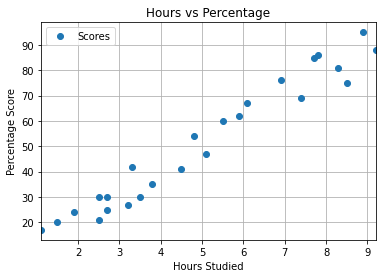

In [78]:
# Plotting the distribution of scores
df_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()


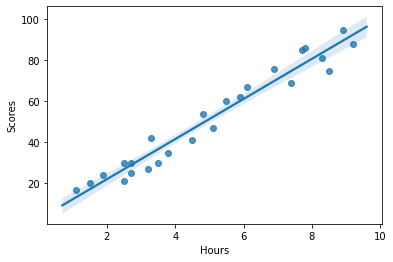

In [54]:
#To show the direction of relatioinship between the variables i have used regpplot() of seaborn.

sn.regplot(x='Hours',y='Scores', data=df_data);

## Bar PLot

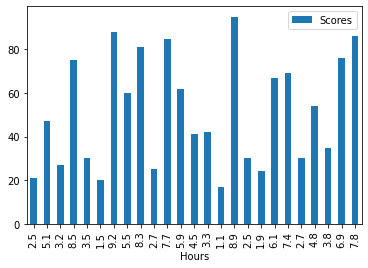

In [55]:
df_data.plot(kind='bar',x='Hours',y='Scores')
plt.show()

**From the graph above graphs we can clearly conclude that there is a positive linear relation between the number of hours studied and percentage of score.**

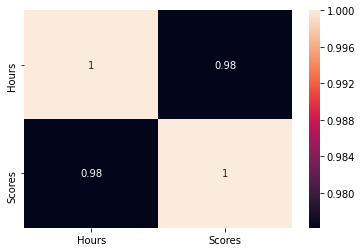

In [81]:
#o calculate the correlation among the variables
df_data.corr()

sn.heatmap(df_data.corr() , annot = True)

In [57]:

#change to dataframe variables
Hours=pd.DataFrame(df_data['Hours'])
Scores=pd.DataFrame(df_data['Scores'])
Hours

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


### **Building the Linear Regression Model**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [84]:
X = df_data.iloc[:, :-1].values  
y = df_data.iloc[:, 1].values  

Now we split this data into training and test sets. 

In [85]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

In [87]:
## check th size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test)

(17, 1)
(8, 1)
(17,)
[20 27 69 30 62 35 24 86]


In [89]:
import time

model = LinearRegression()
s = time.time()
model.fit(X_train, y_train) 

print("Training complete.")
print((time.time() - s)*1000 , "ms")

Training complete.
3.000020980834961 ms


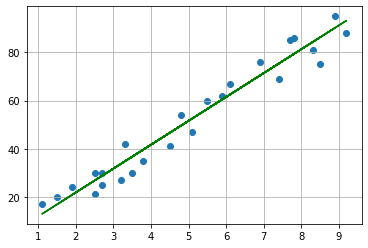

In [92]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='g');
plt.grid()
plt.show()

In [93]:
 # Testing data - In Hours
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [94]:
# Comparing Actual vs Predicted
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
5,35,39.678655
6,24,20.848407
7,86,79.321281


In [95]:
X=pd.DataFrame(X_test)
Y=pd.DataFrame(y_pred)
df=pd.concat([X,Y],axis=1,keys=['Hrs_eval','Scores_pred'])
df

,Hrs_eval,Scores_pred
,0,0
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033
5,3.8,39.678655
6,1.9,20.848407
7,7.8,79.321281


## To test for hour=9.25

In [97]:

# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [102]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred).round(2)) 

Mean Absolute Error: 4.43
